<a href="https://colab.research.google.com/github/grimtoma/book_recomandation/blob/main/recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise - Data Scientist
Problem: Book recommendations - „I like Lord of the Rings, what else should I read?“

**Goal:**
- take some data, try some approaches, produce some code, get some results
- then come and show us your solution and have a chat around it - show how you think about a specific problem, how you are able to explain what approach you used and why, think about the limitations of the approach and how things could be improved if there was more time, what you think of the results and if they make sense, etc.

**Philosophy:**
- the actual result and code are not that important – the journey there and potential future paths are more important
- if you are able to follow-through with some ideas then great, if you just start something and have a clear idea on how to proceed that is also useful
- the expectation is that you will spend an evening or two with the task (but there are no bounds to proactivity if you enjoy playing with the problem)

**Data:**
- available open dataset: http://www2.informatik.uni-freiburg.de/~cziegler/BX/
- alternatively feel free to grab any other relevant data set

**Tools:**
- use whatever you are comfortable in (R, Python, Matlab, Java, SQL,…) or feel free to use it as an opportunity to try out a new language
- it is not a contest in finding the best black-box library and blindly using it – own solutions are preferred even if they are simple
- how to present: up to you – slides, walking through code, drawing, …

# Data - loading

In [2]:
import os
if os.path.exists("/content/BX-CSV-Dump.zip"):
  print("Already downloaded")
else:
  !pip install wget
  !wget http://www2.informatik.uni-freiburg.de/~cziegler/BX/BX-CSV-Dump.zip
  !unzip "/content/BX-CSV-Dump.zip" -d "/content/data/"

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=150566bfd6a68a3f668463d928b7b2e0433b58b12c4800b084035091d5e12ea7
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
--2023-08-25 21:45:39--  http://www2.informatik.uni-freiburg.de/~cziegler/BX/BX-CSV-Dump.zip
Resolving www2.informatik.uni-freiburg.de (www2.informatik.uni-freiburg.de)... 132.230.105.133
Connecting to www2.informatik.uni-freiburg.de (www2.informatik.uni-freiburg.de)|132.230.105.133|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘BX-CSV-Dump.zip’

BX-CSV-Dump.zip     100%[===================>]  24.88M  78.8MB/s    in 0.3s    

2023-08-25 21:45:39 (78.8 MB/s) - ‘BX-CSV-Dump.zip’ saved [26085508/26085508]

Archive:  /content/BX-CSV-Dump.zip
  inflating: /content/data/BX-Book-Ratings.csv  
  inflating: /content

In [3]:
import os
import pandas as pd
book_ratings_df = pd.read_csv('/content/data/BX-Book-Ratings.csv', sep=";", on_bad_lines="warn", encoding='ISO-8859-1')
books_df = pd.read_csv('/content/data/BX-Books.csv', sep=";", on_bad_lines="warn", encoding='ISO-8859-1')
users_df = pd.read_csv('/content/data/BX-Users.csv', sep=";", on_bad_lines="warn", encoding='ISO-8859-1')

Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9

Skipping line 209388: expected 8 fields, saw 9
Skipping line 220626: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 11
Skipping line 228957: expected 8 fields, saw 10
Skipping line 245933: expected 8 fields, saw 9
Skipping line 251296: expected 8 fields, saw 9
Skipping line 259941: expected 8 fields, saw 9
Skipping line 261529: expected 8 fields, saw 9

<ipython-input-3-bdb165811656>:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on imp

In [4]:
print(book_ratings_df.columns)
print(books_df.columns)
print(users_df.columns)

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')
Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')
Index(['User-ID', 'Location', 'Age'], dtype='object')


# Data - visualization


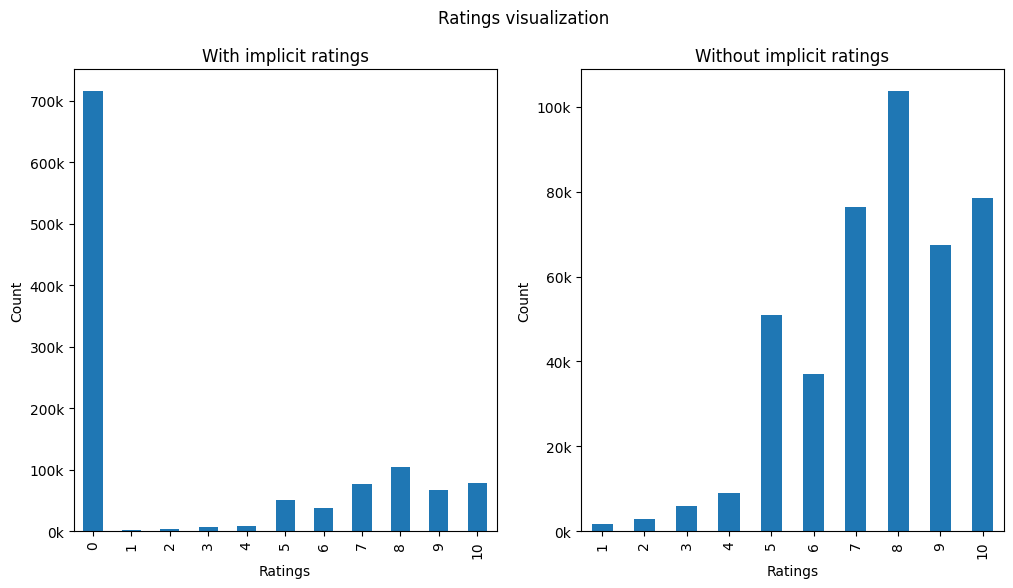

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle("Ratings visualization")

ratings_count_explicit = book_ratings_df.loc[book_ratings_df["Book-Rating"]>0]["Book-Rating"].value_counts()
ratings_count = book_ratings_df["Book-Rating"].value_counts()

ratings_count_explicit = ratings_count_explicit.sort_index()
ratings_count = ratings_count.sort_index()

ratings_count.plot(ax=axes[0],kind="bar")
ratings_count_explicit.plot(ax=axes[1],kind="bar")


axes[0].set_xlabel("Ratings")
axes[0].set_ylabel("Count")
axes[0].set_title("With implicit ratings")
axes[0].yaxis.set_major_formatter(lambda x, pos: str(int(x/1000))+"k")

axes[1].set_xlabel("Ratings")
axes[1].set_ylabel("Count")
axes[1].set_title("Without implicit ratings")
axes[1].yaxis.set_major_formatter(lambda x, pos: str(int(x/1000))+"k")


plt.show()

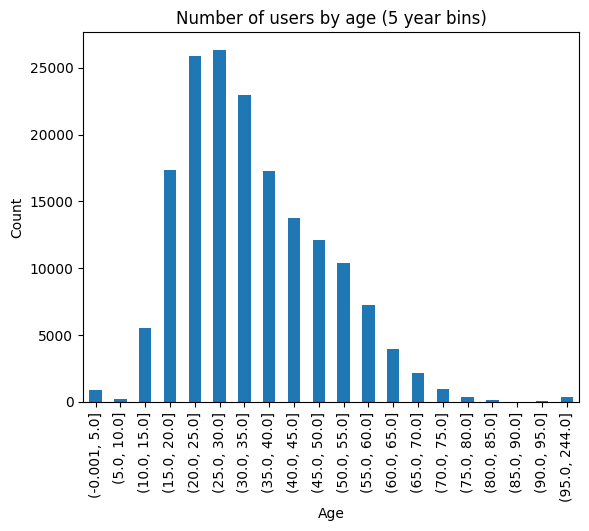

In [6]:
age_bins = list(range(0,100,5))
age_bins.append(244)

user_ages = users_df["Age"].value_counts(bins=age_bins).sort_index()

fig = user_ages.plot(kind="bar")

fig.set_title("Number of users by age (5 year bins)")
fig.set_xlabel("Age")
fig.set_ylabel("Count")
plt.show()

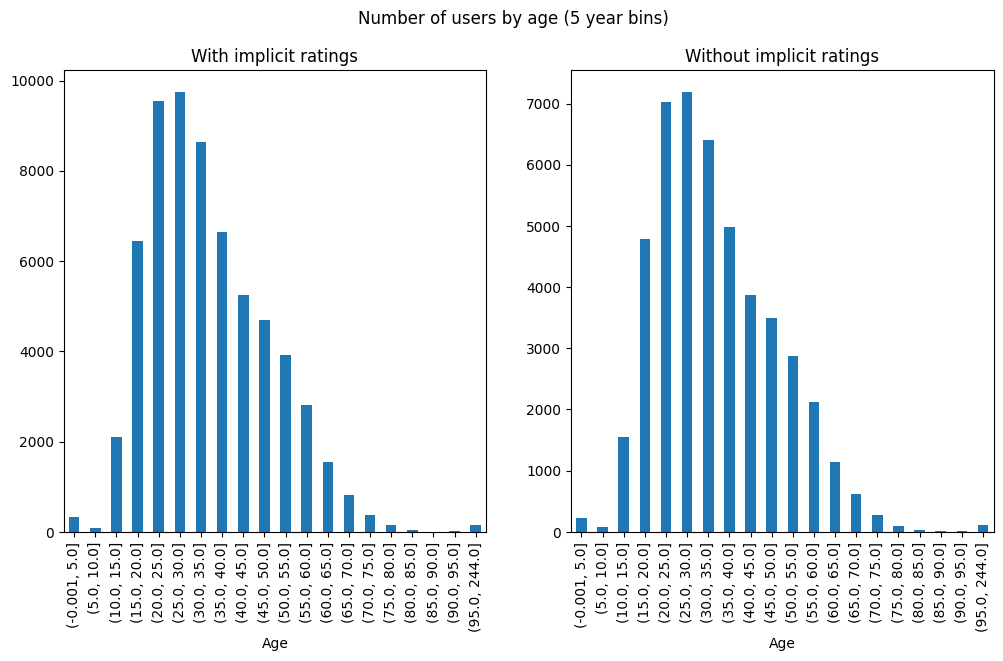

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

age_bins = list(range(0,100,5))
age_bins.append(244)

user_ages_implicit = users_df.loc[book_ratings_df.loc[book_ratings_df["Book-Rating"] <= 10, "User-ID"].unique(),"Age"].value_counts(bins=age_bins).sort_index()
user_ages_explicit = users_df.loc[book_ratings_df.loc[book_ratings_df["Book-Rating"] > 0, "User-ID"].unique(),"Age"].value_counts(bins=age_bins).sort_index()

user_ages_implicit.plot(ax=axes[0], kind="bar")
user_ages_explicit.plot(ax=axes[1], kind="bar")

axes[0].set_xlabel("Age")
axes[0].set_title("With implicit ratings")
axes[1].set_xlabel("Age")
axes[1].set_title("Without implicit ratings")

fig.suptitle("Number of users by age (5 year bins)")

fig.show()

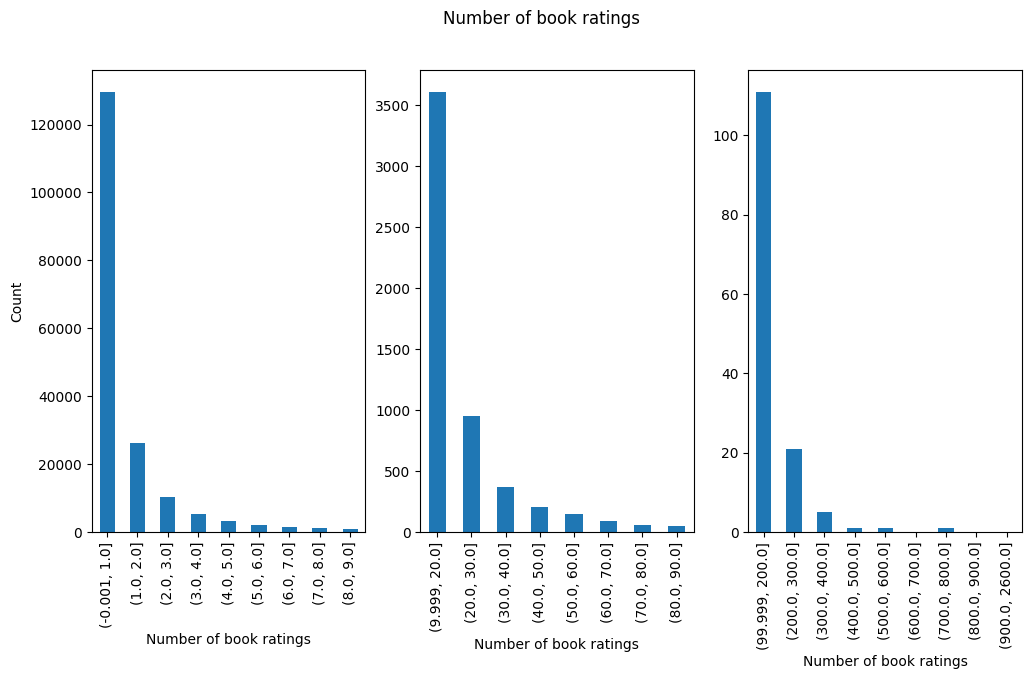

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

small_bins = list(range(0,10,1))
medium_bins = list(range(10,100,10))
large_bins = list(range(100,1000,100))
large_bins.append(2600)
books_ratings_count_bins = book_ratings_df.loc[book_ratings_df["Book-Rating"] > 0,"ISBN"].value_counts()
books_ratings_small_bins = books_ratings_count_bins.value_counts(bins=small_bins).sort_index()
books_ratings_medium_bins = books_ratings_count_bins.value_counts(bins=medium_bins).sort_index()
books_ratings_large_bins = books_ratings_count_bins.value_counts(bins=large_bins).sort_index()


books_ratings_small_bins.plot(ax=axes[0],kind="bar")
books_ratings_medium_bins.plot(ax=axes[1],kind="bar")
books_ratings_large_bins.plot(ax=axes[2],kind="bar")

axes[0].set_xlabel("Number of book ratings")
axes[1].set_xlabel("Number of book ratings")
axes[2].set_xlabel("Number of book ratings")
axes[0].set_ylabel("Count")


fig.suptitle("Number of book ratings")

plt.show()

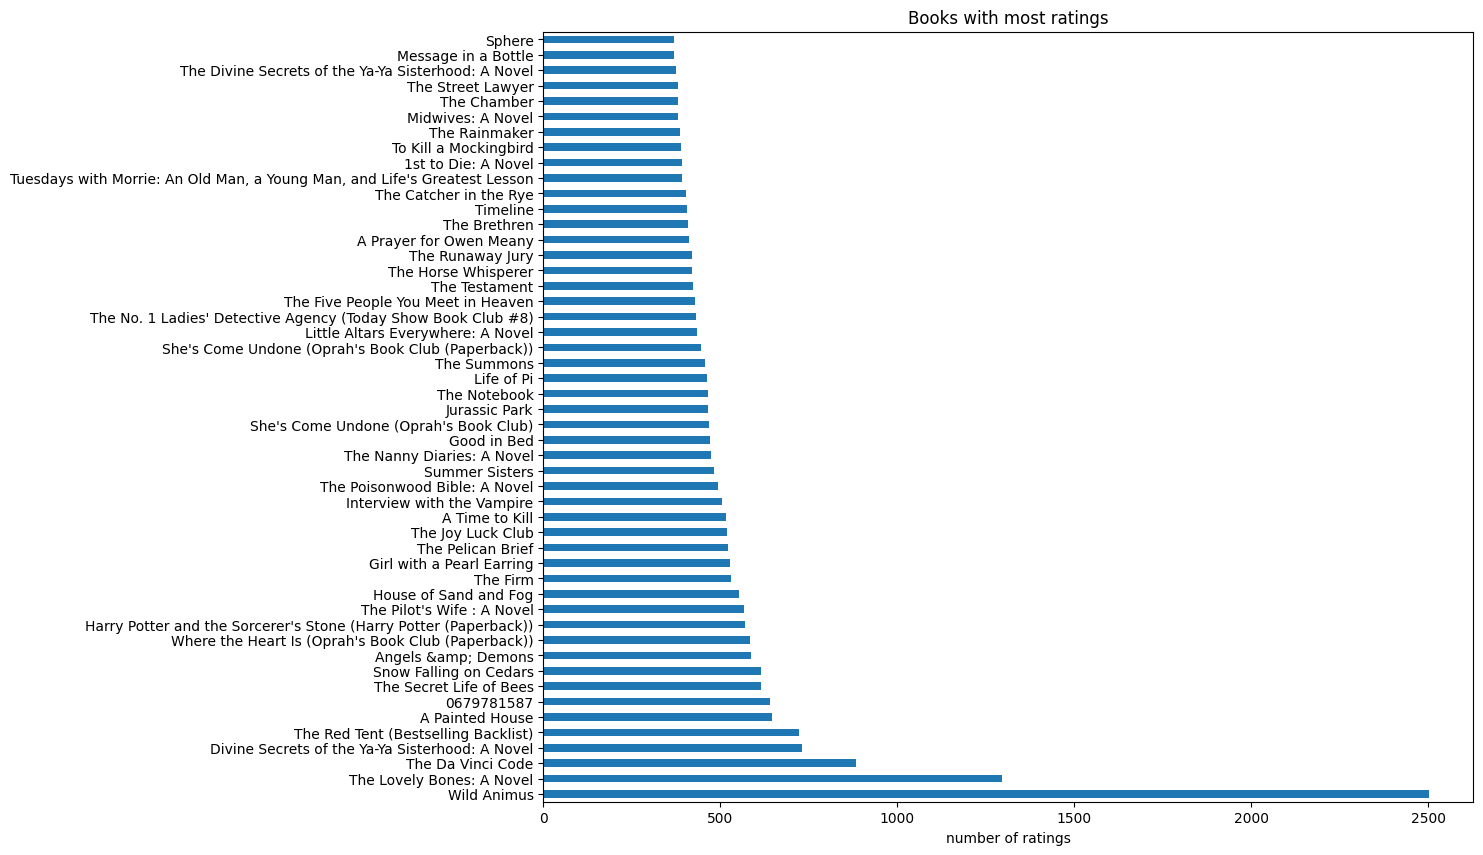

In [9]:
book_ratings_count = book_ratings_df["ISBN"].value_counts()
fig = book_ratings_count[:50].plot(kind="barh",figsize=(12,10))
labels = fig.get_yticklabels()

def ISBN_2_title_formater(x, pos):
  ISBN = labels[x].get_text()
  title = books_df.loc[books_df["ISBN"] == ISBN, "Book-Title"].squeeze()
  if isinstance(title, str):
    return title
  else:
    return ISBN

fig.yaxis.set_major_formatter(ISBN_2_title_formater)
fig.set_title("Books with most ratings")
fig.set_xlabel("number of ratings")

plt.show()

# Recommendations
- General
- User based
- Book based


**General recommendations**

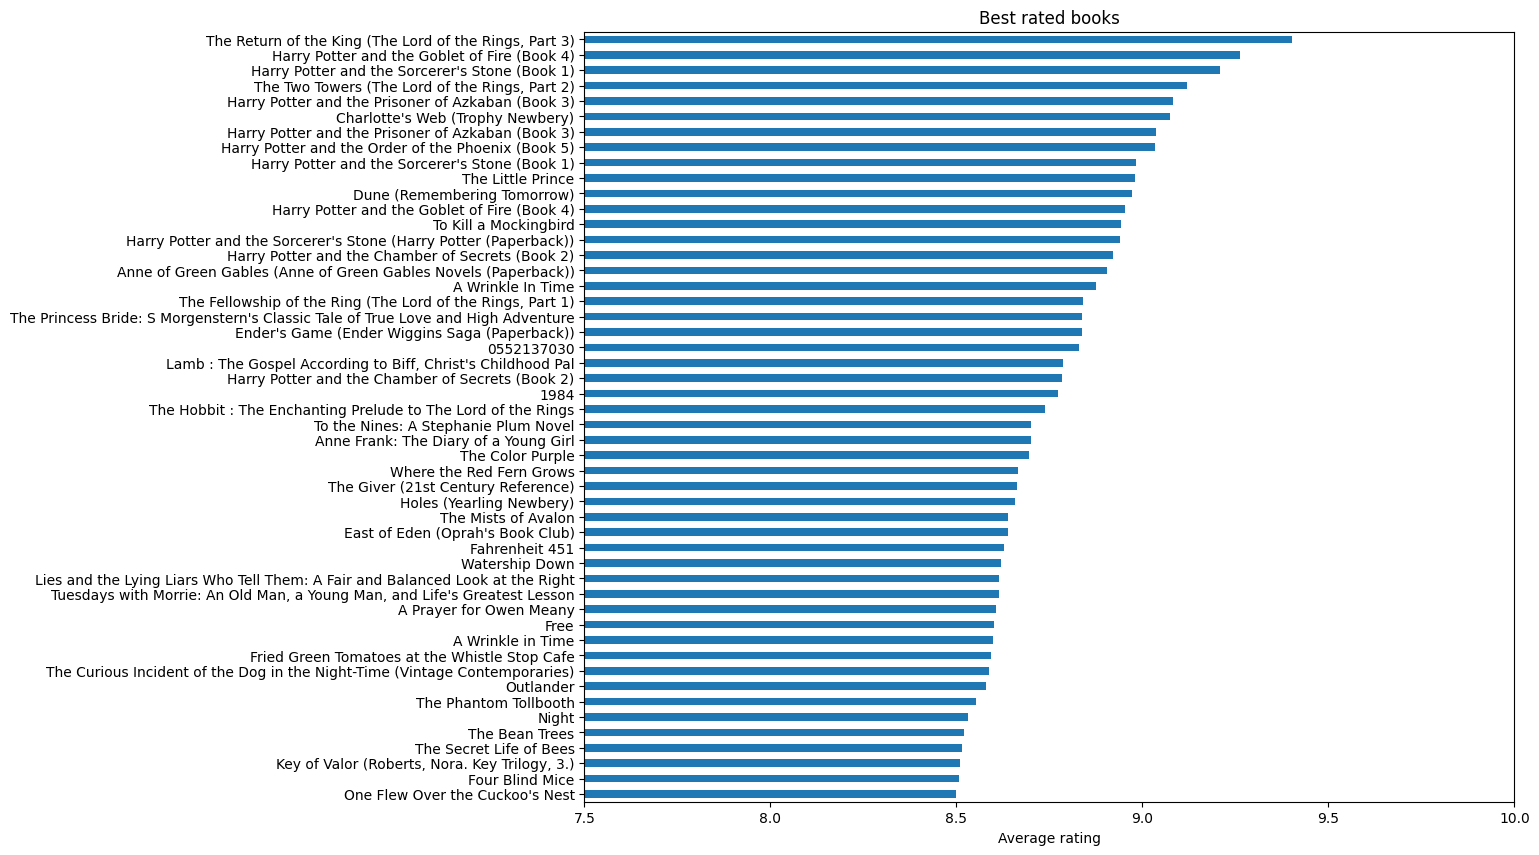

8.50 One Flew Over the Cuckoo's Nest
8.51 Four Blind Mice
8.51 Key of Valor (Roberts, Nora. Key Trilogy, 3.)
8.52 The Secret Life of Bees
8.52 The Bean Trees
8.53 Night
8.55 The Phantom Tollbooth
8.58 Outlander
8.59 The Curious Incident of the Dog in the Night-Time (Vintage Contemporaries)
8.59 Fried Green Tomatoes at the Whistle Stop Cafe
8.60 A Wrinkle in Time
8.60 Free
8.61 A Prayer for Owen Meany
8.62 Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson
8.62 Lies and the Lying Liars Who Tell Them: A Fair and Balanced Look at the Right
8.62 Watership Down
8.63 Fahrenheit 451
8.64 East of Eden (Oprah's Book Club)
8.64 The Mists of Avalon
8.66 Holes (Yearling Newbery)
8.66 The Giver (21st Century Reference)
8.67 Where the Red Fern Grows
8.69 The Color Purple
8.70 Anne Frank: The Diary of a Young Girl
8.70 To the Nines: A Stephanie Plum Novel
8.74 The Hobbit : The Enchanting Prelude to The Lord of the Rings
8.77 1984
8.78 Harry Potter and the Chamber of Secrets (Bo

In [10]:
# removes implicit ratings
book_ratings_explicit_df = book_ratings_df[book_ratings_df["Book-Rating"] > 0]

minimal_number_of_reviews = 50
book_ratings_explicit_count = book_ratings_explicit_df["ISBN"].value_counts()

# select books with more than minimal_number_of_review
valid_books = book_ratings_explicit_count[book_ratings_explicit_count >= minimal_number_of_reviews].index
book_ratings_explicit_df = book_ratings_explicit_df[book_ratings_explicit_df["ISBN"].isin(valid_books)]

# find best rated books by all users
best_rated_books = book_ratings_explicit_df.groupby("ISBN")["Book-Rating"].mean().sort_values(ascending=True)[-50:]

fig = best_rated_books.plot(kind="barh",figsize=(12,10))
labels = fig.get_yticklabels()
fig.yaxis.set_major_formatter(ISBN_2_title_formater)
fig.set_title("Best rated books")
fig.set_xlabel("Average rating")
fig.set_ylabel("")
fig.set_xlim(left=best_rated_books.values.min()-1, right=10)
plt.show()

for (book, rating) in zip(best_rated_books.index, best_rated_books.values):
  title = books_df.loc[books_df["ISBN"]==book,"Book-Title"].squeeze()
  if isinstance(books_df.loc[books_df["ISBN"]==book,"Book-Title"].squeeze(),str):
    print('{:.2f}'.format(rating), title)
  else:
    print('{:.2f}'.format(rating), book)

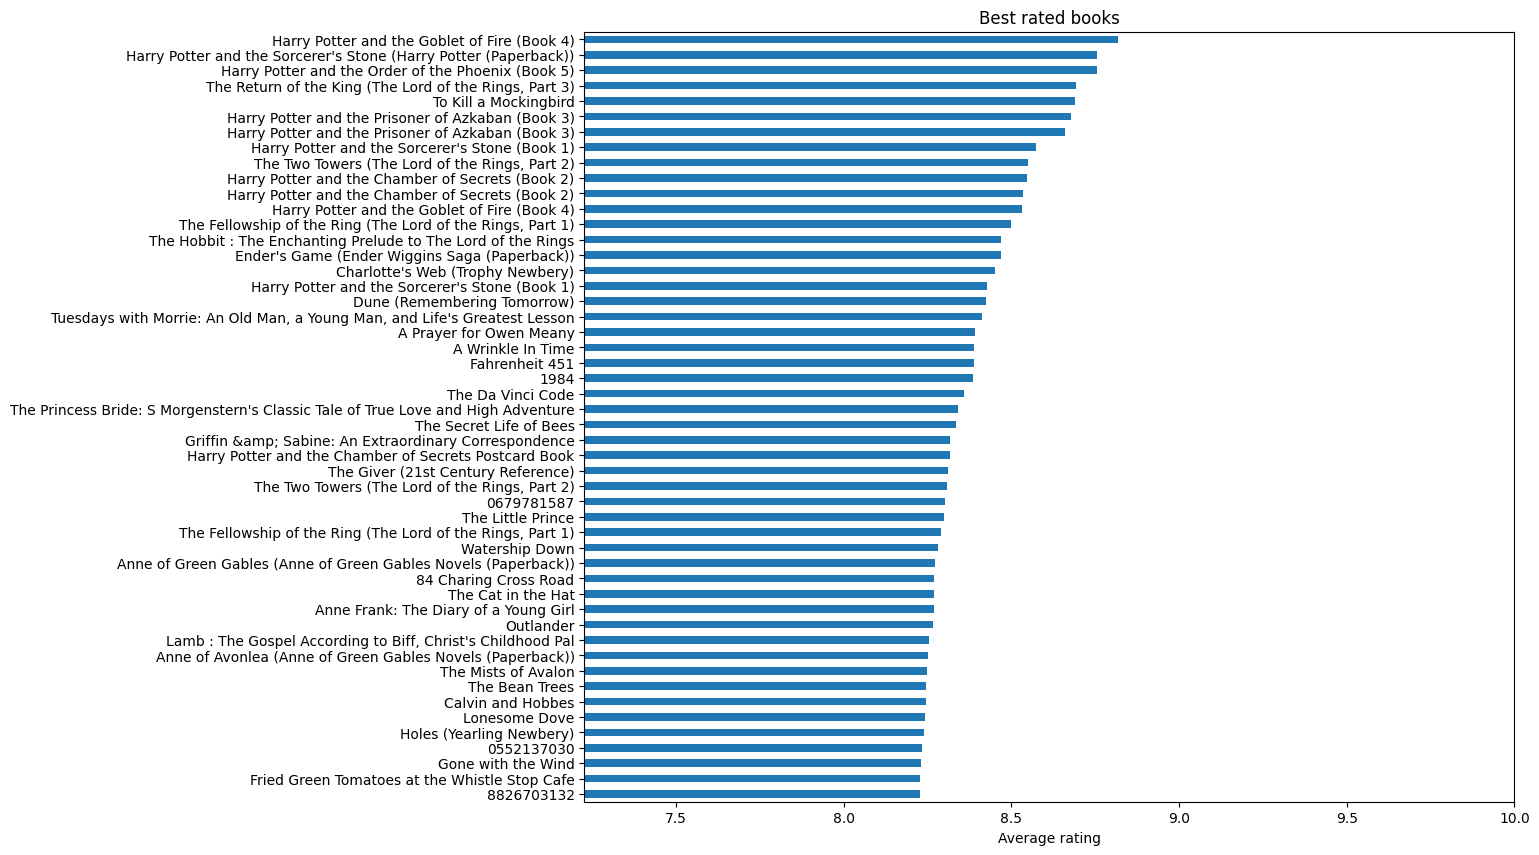

8.23 8826703132
8.23 Fried Green Tomatoes at the Whistle Stop Cafe
8.23 Gone with the Wind
8.23 0552137030
8.24 Holes (Yearling Newbery)
8.24 Lonesome Dove
8.24 Calvin and Hobbes
8.25 The Bean Trees
8.25 The Mists of Avalon
8.25 Anne of Avonlea (Anne of Green Gables Novels (Paperback))
8.25 Lamb : The Gospel According to Biff, Christ's Childhood Pal
8.26 Outlander
8.27 Anne Frank: The Diary of a Young Girl
8.27 The Cat in the Hat
8.27 84 Charing Cross Road
8.27 Anne of Green Gables (Anne of Green Gables Novels (Paperback))
8.28 Watership Down
8.29 The Fellowship of the Ring (The Lord of the Rings, Part 1)
8.30 The Little Prince
8.30 0679781587
8.31 The Two Towers (The Lord of the Rings, Part 2)
8.31 The Giver (21st Century Reference)
8.32 Harry Potter and the Chamber of Secrets Postcard Book
8.32 Griffin &amp; Sabine: An Extraordinary Correspondence
8.33 The Secret Life of Bees
8.34 The Princess Bride: S Morgenstern's Classic Tale of True Love and High Adventure
8.36 The Da Vinci Code


In [26]:
# removes implicit ratings
book_ratings_explicit_df = book_ratings_df[book_ratings_df["Book-Rating"] > 0]


# find best rated books by all users
minimal_number_of_reviews = 50
book_ratings_explicit_count = book_ratings_explicit_df["ISBN"].value_counts()
books_mean_rating = book_ratings_explicit_df.groupby("ISBN")["Book-Rating"].mean()
total_books_mean_rating = book_ratings_explicit_df["Book-Rating"].mean()
best_rated_books = (book_ratings_explicit_count / (book_ratings_explicit_count + minimal_number_of_reviews)) * books_mean_rating + (minimal_number_of_reviews / (book_ratings_explicit_count + minimal_number_of_reviews)) * total_books_mean_rating


best_rated_books = best_rated_books.sort_values()[-50:]
fig = best_rated_books.plot(kind="barh",figsize=(12,10))
labels = fig.get_yticklabels()
fig.yaxis.set_major_formatter(ISBN_2_title_formater)
fig.set_title("Best rated books")
fig.set_xlabel("Average rating")
fig.set_ylabel("")
fig.set_xlim(left=best_rated_books.values.min()-1, right=10)
plt.show()

for (book, rating) in zip(best_rated_books.index, best_rated_books.values):
  title = books_df.loc[books_df["ISBN"]==book,"Book-Title"].squeeze()
  if isinstance(books_df.loc[books_df["ISBN"]==book,"Book-Title"].squeeze(),str):
    print('{:.2f}'.format(rating), title)
  else:
    print('{:.2f}'.format(rating), book)

**User based recommendations**